Completed: Nov 28 2024

# 👋 PyCaret Regression White Wine Research Project - By Jacob Collins

This project will use regression to analysze and predict via a white wine data set, see google form attached to this project for more info. This project is adapted from a PyCaret regression tutorial, credit to the original anonomoys creators for the template, which is linked here: https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

the latter of which was used for this project below.

In [4]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

'3.3.2'

In [2]:
#doublecheck download went through correctly
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

In this research we will use the white wine dataset from https://archive.ics.uci.edu/dataset/186/wine+quality

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [7]:
#get all data
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

In [8]:
#load dataframe
import pandas as pd
data = pd.read_csv('winequality-white.csv', sep=';')

In [9]:
#check if data is structured correctly by showing the first 10 collumns
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [10]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [11]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [12]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [13]:
# init setup on exp
exp.setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [14]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2268,0.0976,0.3112,0.9345,0.0270,0.0216,3.5520
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,1.9170
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3000
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.9610
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,1.1110
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.4730
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0520
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.5720
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0490
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.2750


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
# exp.compare_models()

In [15]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2118,0.0784,0.2800,0.9455,0.0242,0.0202
1,0.2432,0.1427,0.3777,0.9065,0.0317,0.0226
2,0.2411,0.1071,0.3272,0.9249,0.0282,0.0226
3,0.2228,0.0892,0.2986,0.9430,0.0257,0.0210
4,0.2405,0.1097,0.3312,0.9295,0.0286,0.0230
5,0.2385,0.0996,0.3156,0.9268,0.0276,0.0228
6,0.2300,0.0984,0.3138,0.9288,0.0279,0.0225
7,0.2117,0.0880,0.2966,0.9453,0.0257,0.0200
8,0.2079,0.0792,0.2815,0.9441,0.0248,0.0201


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

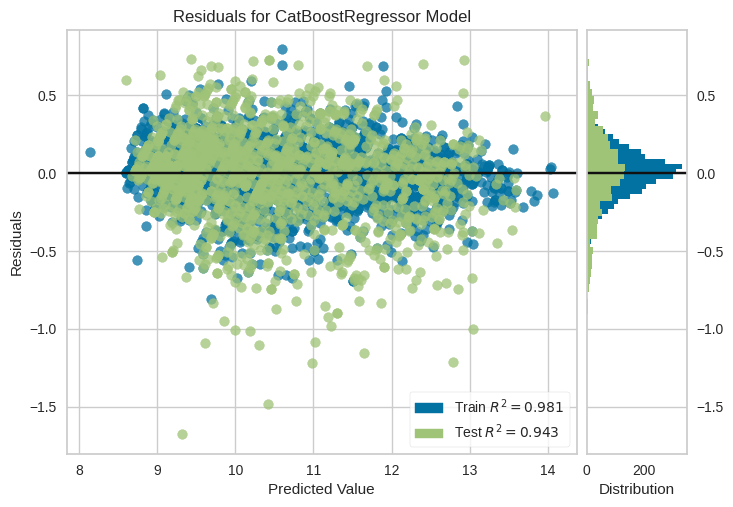

In [16]:
# plot residuals
plot_model(best, plot = 'residuals')

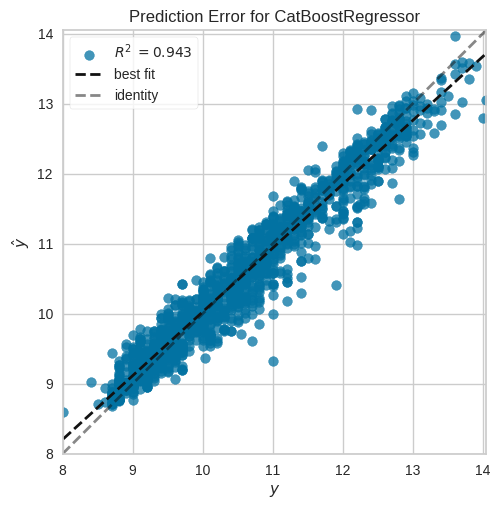

In [17]:
# plot error
plot_model(best, plot = 'error')

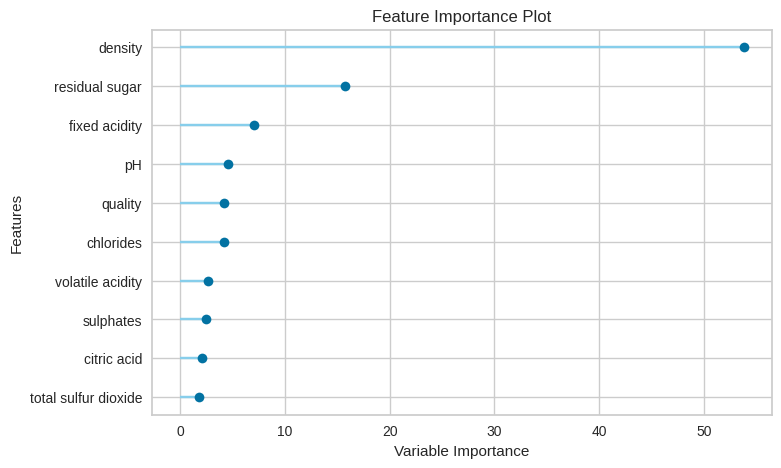

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [20]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2182,0.0875,0.2958,0.9426,0.0254,0.0206


In [21]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1088,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,6,9.2,9.057452
4366,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,6,12.6,12.605241
92,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,7,12.6,12.530360
2901,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,7,11.9,11.750765
2330,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,6,9.3,9.474333


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `alcohol` target. We can then use the new data frame without labels for scoring.

In [22]:
# copy data and drop alcohol

new_data = data.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [23]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.790362
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.555366
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.365011
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,10.021636
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,10.021636


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [24]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x78611414ec50>)

In [25]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7860f2904c10>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [26]:
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [27]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [28]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
773,6.1,0.27,0.30,16.700001,0.039,49.0,172.0,0.99985,3.40,0.45,5.0
3019,7.2,0.32,0.30,8.250000,0.020,14.0,104.0,0.99362,2.99,0.44,6.0
3164,7.8,0.30,0.36,4.600000,0.024,20.0,198.0,0.99222,3.06,0.66,6.0
445,7.1,0.32,0.32,11.000000,0.038,16.0,66.0,0.99370,3.24,0.40,3.0
3890,6.4,0.38,0.26,8.200000,0.043,28.0,98.0,0.99234,2.99,0.31,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1593,8.6,0.16,0.49,7.300000,0.043,9.0,63.0,0.99530,3.13,0.59,6.0
4060,6.4,0.41,0.01,6.100000,0.048,20.0,70.0,0.99362,3.19,0.42,5.0
1346,7.0,0.46,0.39,6.200000,0.039,46.0,163.0,0.99280,3.21,0.35,7.0
3454,5.8,0.54,0.00,1.400000,0.033,40.0,107.0,0.98918,3.26,0.35,5.0


In [29]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [30]:
# init setup with normalize = True
s = setup(data, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


<Axes: >

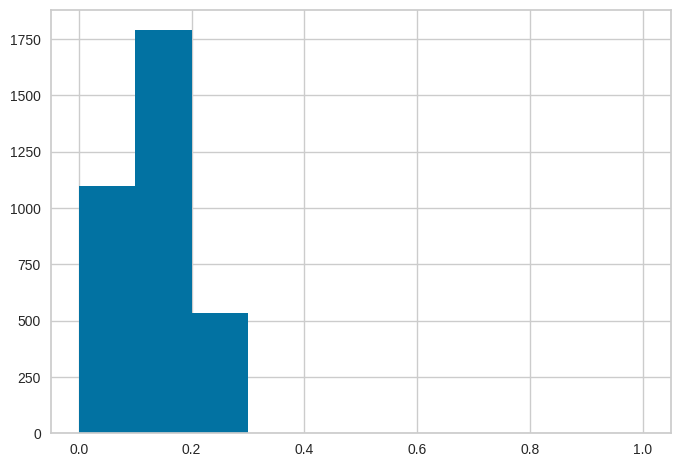

In [34]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['density'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

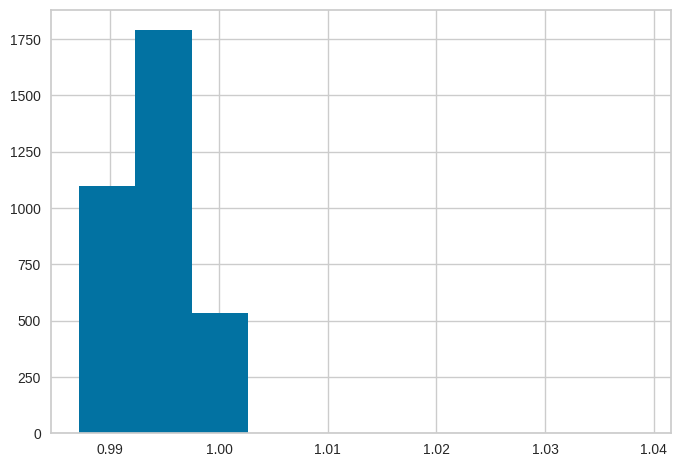

In [35]:
get_config('X_train')['density'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [36]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.2030
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.9200
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3700
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.9640
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.1110
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.5500
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.0550
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.0890
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0580
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.5670


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [37]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [38]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.4240
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.7300
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3430
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.9040
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.1130
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.5200
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.0570


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [49]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [40]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.424
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.730
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.343
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.904
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.113
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.520
dt,Decision Tree Regressor,0.3049,0.2406,0.4889,0.8388,0.0421,0.0288,0.057


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [41]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2263,0.1256,0.3529,0.9157,0.0304,0.0214,1.1300
catboost,CatBoost Regressor,0.2269,0.0976,0.3112,0.9345,0.0270,0.0216,3.1910
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3140
lightgbm,Light Gradient Boosting Machine,0.2442,0.1103,0.3312,0.9262,0.0286,0.0232,0.7890
rf,Random Forest Regressor,0.2450,0.1243,0.3511,0.9167,0.0302,0.0232,1.9490
huber,Huber Regressor,0.2817,0.2378,0.4404,0.8352,0.0344,0.0271,0.0910
gbr,Gradient Boosting Regressor,0.2968,0.1538,0.3912,0.8968,0.0339,0.0284,0.6440
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.5820
lar,Least Angle Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0630
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0390


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [44]:
# list of top 3 models by MAE
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

This result shows extratrees, followed by catboost, followed by xgboosts being the top models by MAE, doesn't have a pretty display like in the original tutorial (perhaps due to different versioning) but the data is still visible.

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [50]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [51]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3028,0.1454,0.3812,0.8989,0.0334,0.0291
1,0.3229,0.2016,0.4490,0.8679,0.0391,0.0307
2,0.3003,0.1402,0.3744,0.9016,0.0326,0.0284
3,0.3090,0.1473,0.3838,0.9058,0.0336,0.0296
4,0.2942,0.1548,0.3935,0.9006,0.0369,0.0285
5,0.3096,0.1535,0.3918,0.8872,0.0345,0.0299
6,0.3205,1.0527,1.0260,0.2385,0.0463,0.0309
7,0.2848,0.1333,0.3651,0.9172,0.0321,0.0273
8,0.2950,0.1395,0.3735,0.9016,0.0331,0.0288


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [52]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3028,0.1454,0.3812,0.8989,0.0334,0.0291
1,0.3229,0.2016,0.4490,0.8679,0.0391,0.0307
2,0.3003,0.1402,0.3744,0.9016,0.0326,0.0284
3,0.3090,0.1473,0.3838,0.9058,0.0336,0.0296
4,0.2942,0.1548,0.3935,0.9006,0.0369,0.0285
5,0.3096,0.1535,0.3918,0.8872,0.0345,0.0299
6,0.3205,1.0527,1.0260,0.2385,0.0463,0.0309
7,0.2848,0.1333,0.3651,0.9172,0.0321,0.0273
8,0.2950,0.1395,0.3735,0.9016,0.0331,0.0288


In [53]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3192,0.1695,0.4117,0.8868,0.0358,0.0304
1,0.2956,0.4092,0.6397,0.7222,0.0384,0.0285
2,0.3084,0.1566,0.3958,0.8988,0.0346,0.0299
Mean,0.3077,0.2451,0.4824,0.8359,0.0363,0.0296
Std,0.0097,0.1162,0.1114,0.0806,0.0016,0.0008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9850,1.4544,1.2060,-0.0117,0.1086,0.0945
1,1.0347,1.7276,1.3144,-0.1319,0.1157,0.0983
2,1.0373,1.6088,1.2684,-0.1289,0.1138,0.0988
3,0.9371,1.3912,1.1795,0.1101,0.1047,0.0897
4,1.0239,1.6182,1.2721,-0.0393,0.1124,0.0983
5,0.9941,1.5400,1.2410,-0.1313,0.1123,0.0961
6,1.0640,2.1983,1.4827,-0.5900,0.1472,0.1047
7,0.9154,1.4127,1.1886,0.1224,0.1062,0.0871
8,1.0190,1.6215,1.2734,-0.1445,0.1163,0.0995


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [55]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [56]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2870,0.2026,0.4501,0.8591,0.0394,0.0275
1,0.3338,0.3038,0.5512,0.8010,0.0470,0.0310
2,0.3113,0.2321,0.4818,0.8372,0.0407,0.0287
3,0.3343,0.3154,0.5616,0.7983,0.0478,0.0312
4,0.3269,0.2613,0.5111,0.8322,0.0444,0.0314
5,0.3047,0.2346,0.4844,0.8277,0.0424,0.0291
6,0.2942,0.2186,0.4675,0.8419,0.0412,0.0286
7,0.2872,0.2196,0.4687,0.8636,0.0402,0.0271
8,0.2953,0.2363,0.4861,0.8332,0.0413,0.0280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1649.9559,20053618.6090,4478.1267,0.8635,0.3315,0.1164
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [57]:
dt

DecisionTreeRegressor(random_state=123)

In [58]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2870,0.2026,0.4501,0.8591,0.0394,0.0275
1,0.3338,0.3038,0.5512,0.8010,0.0470,0.0310
2,0.3113,0.2321,0.4818,0.8372,0.0407,0.0287
3,0.3343,0.3154,0.5616,0.7983,0.0478,0.0312
4,0.3269,0.2613,0.5111,0.8322,0.0444,0.0314
5,0.3047,0.2346,0.4844,0.8277,0.0424,0.0291
6,0.2942,0.2186,0.4675,0.8419,0.0412,0.0286
7,0.2872,0.2196,0.4687,0.8636,0.0402,0.0271
8,0.2953,0.2363,0.4861,0.8332,0.0413,0.0280


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [59]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3396,0.2094,0.4576,0.8543,0.0402,0.0327
1,0.3678,0.2901,0.5386,0.8099,0.0459,0.0343
2,0.3523,0.2269,0.4763,0.8408,0.0409,0.0329
3,0.3444,0.2530,0.5030,0.8382,0.0434,0.0323
4,0.3670,0.2616,0.5114,0.8320,0.0443,0.0352
5,0.3515,0.2249,0.4742,0.8348,0.0409,0.0335
6,0.3254,0.2025,0.4500,0.8536,0.0398,0.0317
7,0.3254,0.2146,0.4633,0.8667,0.0393,0.0305
8,0.3316,0.2147,0.4634,0.8484,0.0403,0.0321


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [60]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [61]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'quality'],
                                                                 tran...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                   

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [62]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3791,0.2512,0.5012,0.8252,0.0430,0.0359
1,0.4053,0.3052,0.5525,0.8000,0.0468,0.0378
2,0.3835,0.2572,0.5072,0.8195,0.0438,0.0361
3,0.4065,0.3021,0.5497,0.8068,0.0475,0.0384
4,0.3854,0.2753,0.5247,0.8232,0.0455,0.0371
5,0.3454,0.2214,0.4705,0.8374,0.0404,0.0329
6,0.3845,0.2662,0.5160,0.8074,0.0455,0.0373
7,0.3570,0.2464,0.4964,0.8469,0.0427,0.0336
8,0.3697,0.2601,0.5100,0.8164,0.0440,0.0356


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 3428 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [63]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2314,0.1031,0.3210,0.9283,0.0278,0.0219
1,0.2675,0.1687,0.4107,0.8895,0.0345,0.0249
2,0.2670,0.1367,0.3697,0.9041,0.0316,0.0249
3,0.2696,0.1688,0.4108,0.8921,0.0354,0.0251
4,0.2662,0.1413,0.3759,0.9093,0.0323,0.0253
5,0.2531,0.1306,0.3613,0.9041,0.0312,0.0240
6,0.2927,0.1677,0.4095,0.8787,0.0362,0.0284
7,0.2290,0.1066,0.3264,0.9338,0.0282,0.0216
8,0.2552,0.1247,0.3531,0.9120,0.0308,0.0246


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [64]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2125,0.1143,0.3381,0.9205,0.0291,0.0200
1,0.2345,0.1785,0.4225,0.8831,0.0354,0.0215
2,0.2377,0.1492,0.3862,0.8953,0.0330,0.0220
3,0.2412,0.1551,0.3938,0.9008,0.0337,0.0224
4,0.2166,0.1293,0.3596,0.9170,0.0306,0.0202
5,0.2425,0.1443,0.3799,0.8940,0.0327,0.0230
6,0.2424,0.1464,0.3826,0.8941,0.0337,0.0234
7,0.1873,0.0973,0.3119,0.9396,0.0270,0.0177
8,0.2216,0.1252,0.3539,0.9116,0.0308,0.0213


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [65]:
# top 3 models based on mae
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [66]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1950,0.0740,0.2720,0.9485,0.0235,0.0185
1,0.2282,0.1425,0.3776,0.9066,0.0317,0.0211
2,0.2281,0.1124,0.3353,0.9211,0.0287,0.0213
3,0.2156,0.0983,0.3135,0.9371,0.0267,0.0201
4,0.2261,0.1100,0.3317,0.9294,0.0284,0.0215
5,0.2176,0.0937,0.3062,0.9311,0.0266,0.0208
6,0.2239,0.1042,0.3228,0.9246,0.0288,0.0219
7,0.1976,0.0810,0.2847,0.9497,0.0246,0.0187
8,0.1915,0.0794,0.2818,0.9440,0.0247,0.0185


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7860f1e54250>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [67]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2043,0.0744,0.2728,0.9482,0.0237,0.0195
1,0.2360,0.1398,0.3739,0.9084,0.0314,0.0219
2,0.2317,0.1048,0.3237,0.9265,0.0279,0.0218
3,0.2178,0.0903,0.3004,0.9423,0.0258,0.0205
4,0.2336,0.1060,0.3256,0.9319,0.0281,0.0223
5,0.2304,0.0957,0.3093,0.9297,0.0269,0.0220
6,0.2259,0.0985,0.3139,0.9288,0.0280,0.0221
7,0.2037,0.0825,0.2872,0.9488,0.0249,0.0192
8,0.2004,0.0764,0.2764,0.9461,0.0244,0.0194


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7860f29ac490>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

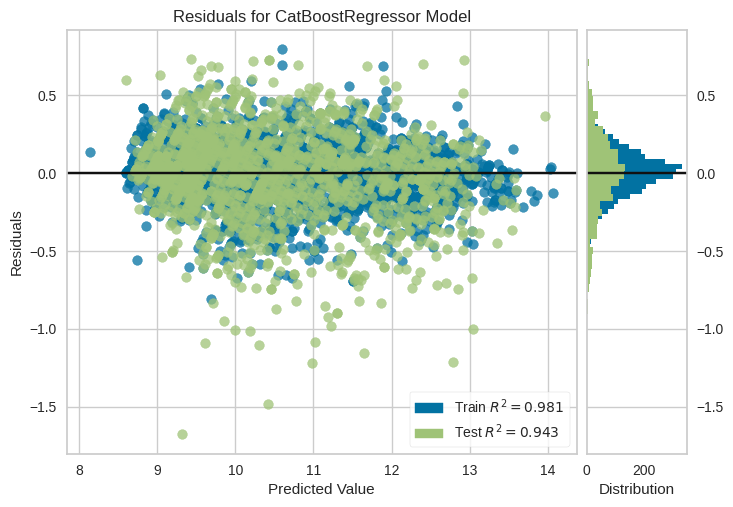

In [68]:
# plot residuals
plot_model(best, plot = 'residuals')

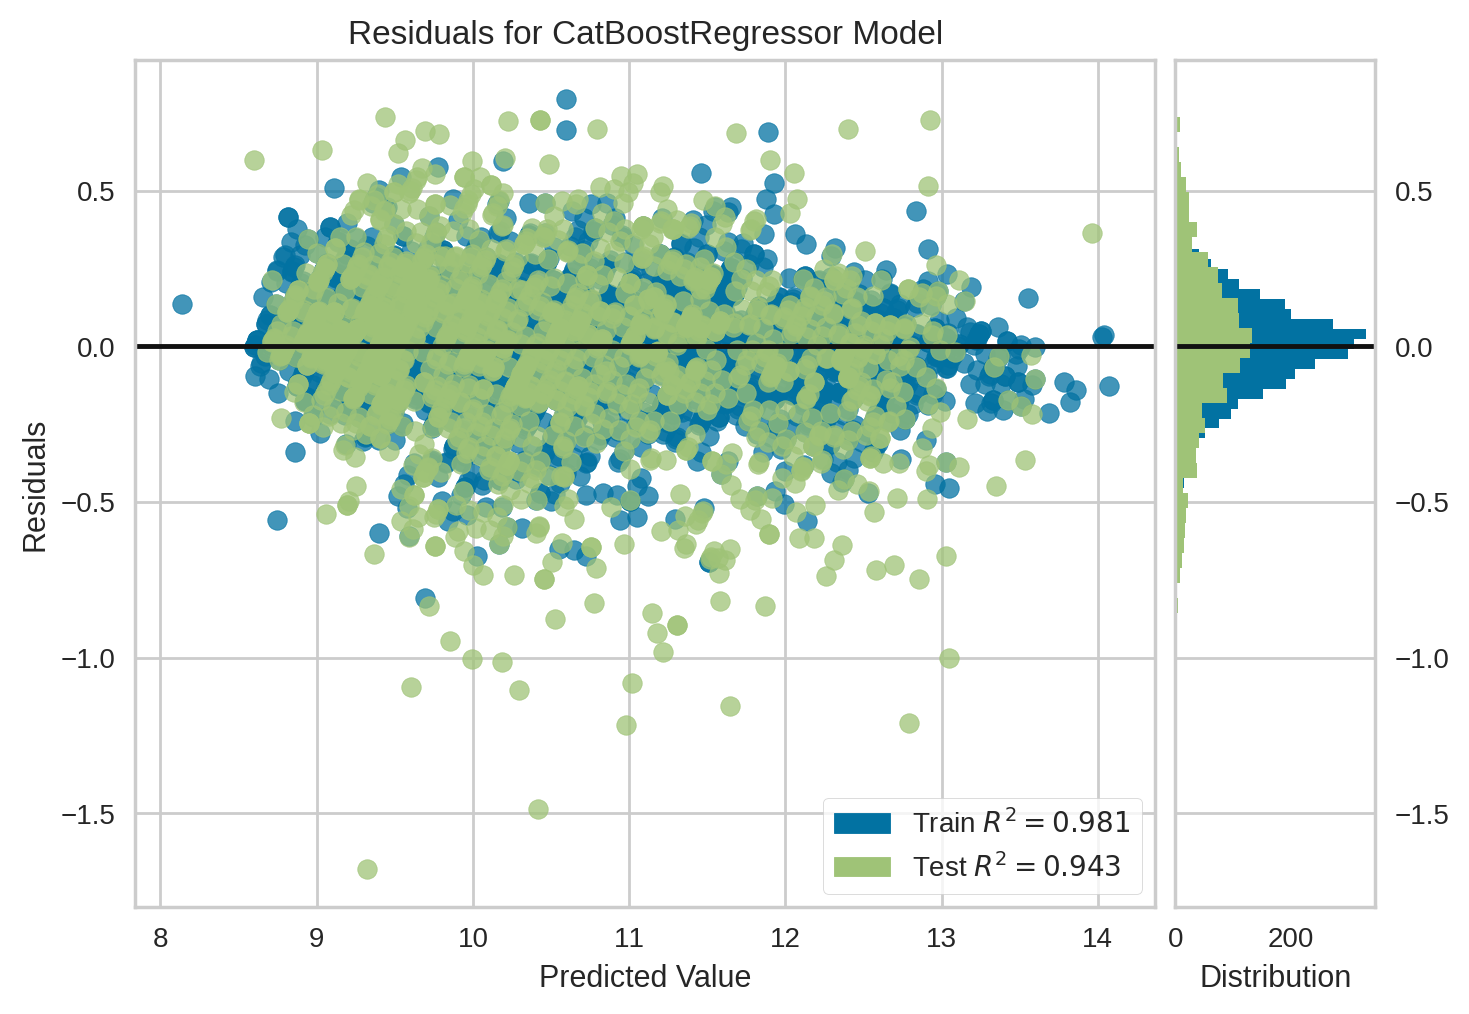

In [69]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [70]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [71]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2367,0.0923,0.3039,0.9358,0.0263,0.0225
1,0.2647,0.1542,0.3927,0.8990,0.0332,0.0247
2,0.2489,0.1065,0.3264,0.9252,0.0281,0.0235
3,0.2531,0.1169,0.3419,0.9252,0.0292,0.0237
4,0.2494,0.1179,0.3434,0.9243,0.0297,0.0239
5,0.2412,0.1019,0.3192,0.9252,0.0277,0.0230
6,0.2454,0.1162,0.3408,0.9160,0.0303,0.0240
7,0.2340,0.1039,0.3224,0.9354,0.0277,0.0220
8,0.2289,0.0950,0.3082,0.9330,0.0270,0.0221


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

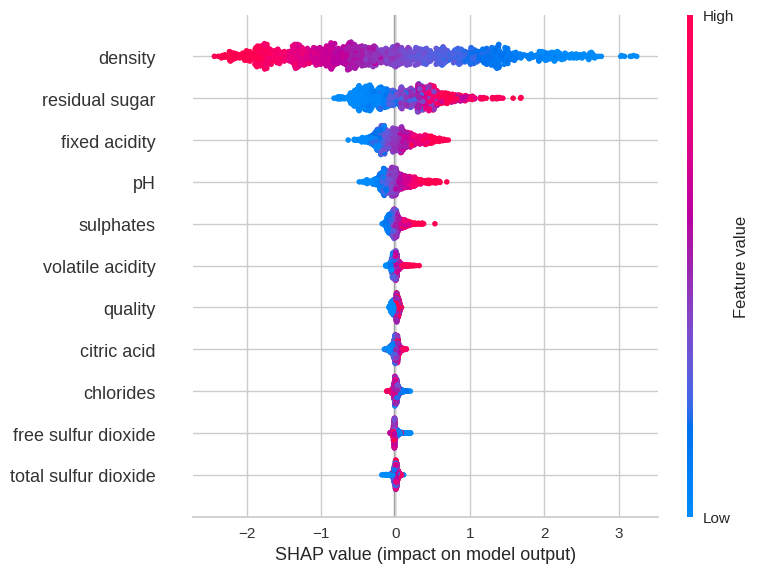

In [72]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [73]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [74]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/64 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.3044,0.2410,0.4514,0.8337,0.0355,0.0293
1,Lasso Regression,"(TransformerWrapper(include=['fixed acidity', ...",1.0350,1.5118,1.2289,-0.0087,0.1053,0.0985
2,Ridge Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4269,0.3560,0.5847,0.7587,0.0484,0.0407
3,Elastic Net,"(TransformerWrapper(include=['fixed acidity', ...",1.0350,1.5118,1.2289,-0.0087,0.1053,0.0985
4,Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.3044,0.2410,0.4514,0.8337,0.0355,0.0293
...,...,...,...,...,...,...,...,...
58,Decision Tree Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.2582,0.1369,0.3686,0.9081,0.0318,0.0244
59,Decision Tree Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.2251,0.1357,0.3671,0.9087,0.0315,0.0212
60,Voting Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.2130,0.0982,0.3120,0.9342,0.0269,0.0202


In [75]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleIm...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=123, ...))],
                                 n_jobs=-1)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [76]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x786025825690>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [77]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [78]:
# create gradio app
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2f0412afd8eff09aa4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [79]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [80]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [81]:
final_best = finalize_model(best)

In [82]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x786024636f50>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [83]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[7] <= 0.09986305236816406) {
            if (input[7] <= 0.06178760528564453) {
                if (input[1] <= 0.2034313678741455) {
                    if (input[7] <= 0.0416412353515625) {
                        if (input[10] <= 0.5833333730697632) {
                            if (input[5] <= 0.0679442510008812) {
                                if (input[8] <= 0.3317756652832031) {
                                    var0 = 12.5;
                                } else {
                                    if (input[9] <= 0.8546510934829712) {
                                        if (input[4] <= 0.041543032974004745) {
                                            var0 = 13.133333206176758;
                                        } else {
                                            var0 = 13.100000381469727;
                                        }
                       

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [84]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model

In [85]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7860d88c2e90>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [86]:
# save experiment
save_experiment('my_experiment')

In [87]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


See the associated Google form for further observations and conclusions!